# 2-D Exploratory Data Analysis

In this notebook we will pick ONE variable you're interested in understanding from your non-census data and plot it against various census variables in scatterplots or dotplots.

### Standard Python and R imports

In [5]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [7]:
%%R

# My commonly used R imports

require('tidyverse')

## Load the data

In [22]:
%%R
 
# Import data with R
df <- read_csv('merged_data.csv', show_col_types = FALSE)
df

# A tibble: 26,609 × 33
         GEOID NAME        moe population white_race black_race asian_race  kids
         <dbl> <chr>     <dbl>      <dbl>      <dbl>      <dbl>      <dbl> <dbl>
 1 36005000100 Census T…   616       4446         NA         NA         NA    NA
 2 36005000100 Census T…   390         NA       1898         NA         NA    NA
 3 36005000100 Census T…   369         NA         NA       2064         NA    NA
 4 36005000100 Census T…    60         NA         NA         NA        123    NA
 5 36005000100 Census T…    57         NA         NA         NA         NA    58
 6 36005000100 Census T…    20         NA         NA         NA         NA    NA
 7 36005000100 Census T…    13         NA         NA         NA         NA    NA
 8 36005000100 Census T…    NA         NA         NA         NA         NA    NA
 9 36005000200 Census T…   621       4870         NA         NA         NA    NA
10 36005000200 Census T…   332         NA        750         NA         NA    NA
# ℹ 

# Exploratory data analysis



## 2-D visualizations (aka scatter plots)

It seems simple. It's not simple. mainly because...

**CORRELATION =/= CAUSATION**

Comparing variables to one another can be TRICKY!

Let's make some 2-D visualizations (aka scatter plots).

Be VERY careful how you phrase the headlines. Take time to think through what you want to say.




`geom_smooth()` using formula = 'y ~ x'


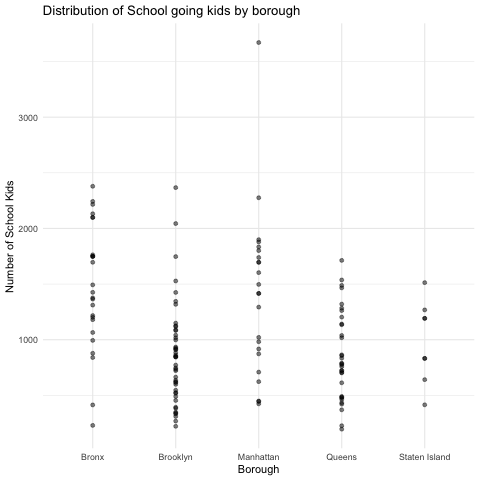

In [14]:
%%R

library(ggplot2)
library(dplyr)

# Filter out rows where population or school_kids is NA, then plot
df %>%
  filter(!is.na(Borough) & !is.na(school_kids)) %>%
  ggplot(aes(x = Borough, y = school_kids)) +
  geom_point(alpha = 0.5) + # Adjust alpha for better visualization if dataset is large
  geom_smooth(method = "lm", color = "blue", se = FALSE) + # Add a linear regression line without confidence interval
  labs(title = "Distribution of School going kids by borough",
       x = "Borough",
       y = "Number of School Kids") +
  theme_minimal()


In [29]:
%%R

library(dplyr)

# Ensure 'med_inc' is numeric
df$med_inc <- as.numeric(df$med_inc)

# Rank schools by highest median income and include school type,
# removing rows with NA in 'med_inc', 'School.Name...ID', or 'School.Type'
ranked_schools <- df %>%
  select(School.Name...ID, School.Type, med_inc) %>%
  filter(!is.na(med_inc) & !is.na(School.Name...ID) & !is.na(School.Type)) %>%
  arrange(desc(med_inc))

# View the ranked list
print(ranked_schools)


# A tibble: 135 × 3


   School.Name...ID                 School.Type med_inc
   <chr>                            <chr>         <dbl>
 1 RAMAZ LOWER SCHOOL               Private      244250
 2 THE CALHOUN SCHOOL               Public       223952
 3 PARK AVENUE CHRISTIAN CHURCH DAY Private      191719
 4 FRIENDS SEMINARY                 Private      173239
 5 BROOKLYN FRIENDS SCHOOL          Private      166250
 6 WINSTON PREPARATORY              Private      156265
 7 BLESSED SACRAMENT SCHOOL         Private      154237
 8 HOLY NAME OF JESUS SCHOOL        Private      146918
 9 P.S. 75 EMILY DICKINSON SCHOOL   Public       146918
10 P.S. 116 MARY L. MURRAY SCHOOL   Public       143183
# ℹ 125 more rows
# ℹ Use `print(n = ...)` to see more rows


In [31]:
%%R

library(dplyr)

# Ensure 'med_inc' is numeric
df$med_inc <- as.numeric(df$med_inc)

# Rank schools by median income and include school type and borough,
# removing rows with NA in 'med_inc', 'School.Name...ID', 'School.Type', or 'Borough'
ranked_schools <- df %>%
  select(School.Name...ID, School.Type, Borough, med_inc) %>%
  filter(!is.na(med_inc) & !is.na(School.Name...ID) & !is.na(School.Type) & !is.na(Borough)) %>%
  arrange(desc(med_inc)) # Arrange by 'med_inc' in ascending order

# View the ranked list
print(ranked_schools)


# A tibble: 135 × 4
   School.Name...ID                 School.Type Borough   med_inc
   <chr>                            <chr>       <chr>       <dbl>
 1 RAMAZ LOWER SCHOOL               Private     Manhattan  244250
 2 THE CALHOUN SCHOOL               Public      Manhattan  223952
 3 PARK AVENUE CHRISTIAN CHURCH DAY Private     Manhattan  191719
 4 FRIENDS SEMINARY                 Private     Manhattan  173239
 5 BROOKLYN FRIENDS SCHOOL          Private     Brooklyn   166250
 6 WINSTON PREPARATORY              Private     Manhattan  156265
 7 BLESSED SACRAMENT SCHOOL         Private     Manhattan  154237
 8 HOLY NAME OF JESUS SCHOOL        Private     Manhattan  146918
 9 P.S. 75 EMILY DICKINSON SCHOOL   Public      Manhattan  146918
10 P.S. 116 MARY L. MURRAY SCHOOL   Public      Manhattan  143183
# ℹ 125 more rows
# ℹ Use `print(n = ...)` to see more rows


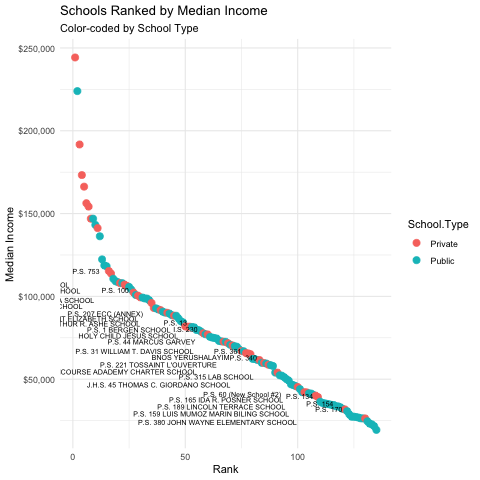

In [33]:
%%R
library(ggplot2)

# Create an artificial rank index for the x-axis
ranked_schools$Rank <- seq_along(ranked_schools$med_inc)

# Create the scatterplot
ggplot(ranked_schools, aes(x = Rank, y = med_inc)) +
  geom_point(aes(color = School.Type), size = 3) + # Color-code by school type
  geom_text(aes(label = School.Name...ID), vjust = -1, hjust = 1.5, size = 2.5, check_overlap = TRUE) + # Optionally add school names
  scale_y_continuous(name = "Median Income", labels = scales::dollar_format()) + # Format y-axis labels as currency
  scale_x_continuous(name = "Rank") +
  theme_minimal() +
  labs(title = "Schools Ranked by Median Income",
       subtitle = "Color-coded by School Type")
